In [4]:
from pydicom import dcmread
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import nibabel as nib
import SimpleITK as sitk
from helpers import *

In [6]:
img_raw = sitk.ReadImage('../DeepLearning/data/MM_WHS/seg_res/1006/Segmentation.nii', sitk.sitkFloat32)
img = sitk.GetArrayFromImage(img_raw)
img.shape

(248, 512, 512)

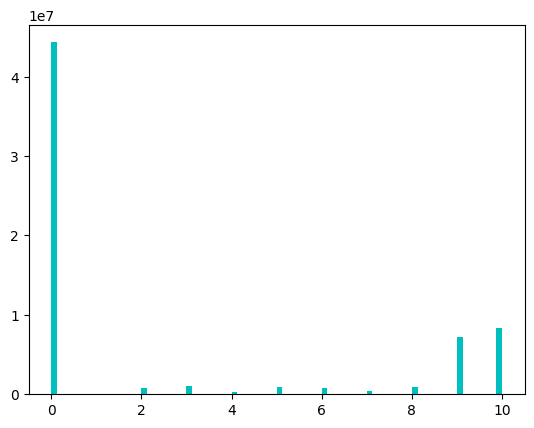

In [8]:
plt.hist(img.flatten(), bins=80, color='c')
plt.show()

In [11]:
array_1d = img.flatten()
unique_values, counts = np.unique(array_1d, return_counts=True)
print("Unique values:", unique_values) 
print("Counts:", counts)

Unique values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Counts: [44327130     4282   746664  1013562   227463   877263   850984   408100
   945921  7203426  8406917]


In [16]:
label_array = np.copy(img) 
# Set the voxels that do not match the value to zero 
label_array[np.where(label_array != 2)] = 0 
explore_3D_array(label_array)

interactive(children=(IntSlider(value=123, description='SLICE', max=247), Output()), _dom_classes=('widget-int…

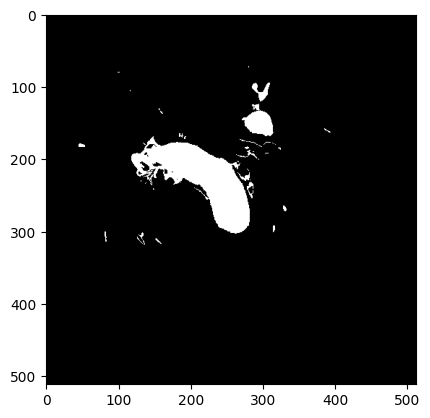

In [19]:
plt.imshow(label_array[197], cmap='gray')
plt.show()

In [25]:
import cv2

image = cv2.imread('output.png', cv2.IMREAD_UNCHANGED)
plt.imshow(image)
plt.show()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh, image_edges = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
canvas = np.zeros(image.shape, np.uint8)
canvas.fill(255)

mask = np.zeros(image.shape, np.uint8)
mask.fill(255)

countours_draw, hierachy = cv2.findContours(image_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 
contours_mask, hierachy = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(canvas, countours_draw, -1, (0, 255, 0), 3)

cv2.imshow("origin", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()